In [ ]:
# Name: Joshua Lindsey
# Date: 07/11/2025
# Project Name: Recognizing Handwritten Digits in Scikit Learn
# Source: Stock Market Price Prediction, Fraud Detection,

In [26]:
# Step 1: Import Libraries

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Step 2: Import Datasets

digits = datasets.load_digits()

# dir function use to display the attributes of the dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
# Function to print a set of image

# - digits.image is a 3D array. The first dimension indexes images, and we can see that there are 1797 in total.
# - The following two dimensions relate to each image's pixels x and y coordinate
# - Each image is 8x8 = 64 pixels in size. 

print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


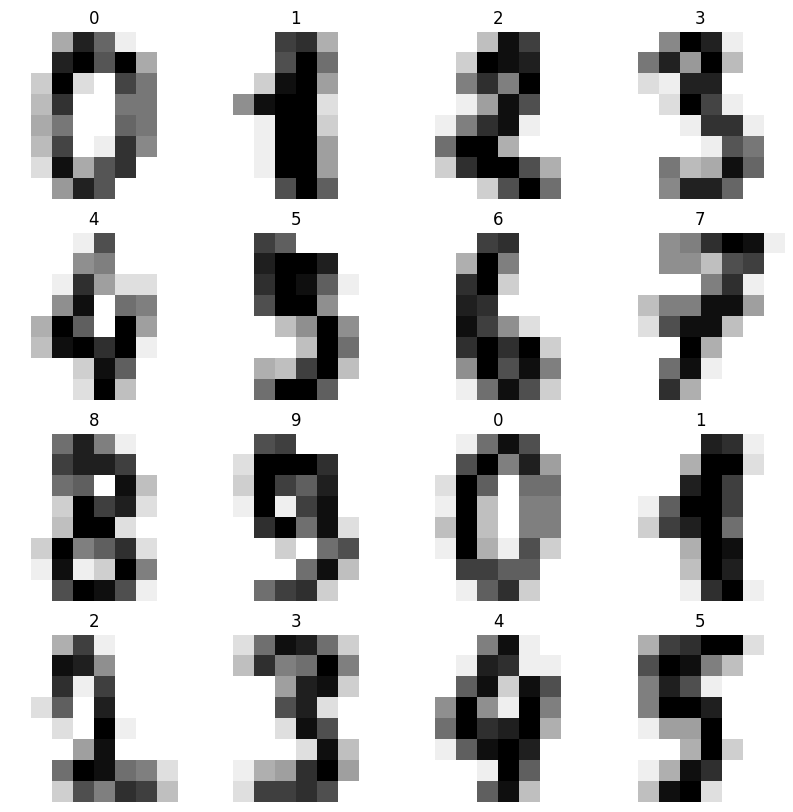

In [15]:
#

def plot_multi(i):
    nplots = 16
    fig = plt.figure(figsize=(10,10))
    for j in range(nplots):
        plt.subplot(4,4, j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()
    
plot_multi(0)

In [49]:
# Set up variables to train model

y = digits.target
x = digits.images.reshape((len(digits.images), -1))

x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

x.shape

(1797, 64)

In [50]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [57]:
# Instantiate the model

mlp = MLPClassifier(hidden_layer_sizes=(15,), 
                    activation='logistic', # (parameter) activation: Literal['relu', 'identity', 'logistic', 'tanh']
                    alpha=0.0001,
                    solver='sgd', # (parameter) solver: Literal['lbfgs', 'sgd', 'adam']
                    tol=0.0001,
                    random_state=1,
                    learning_rate_init=0.1,
                    verbose=True
                    )

# Train the mlp model on the training data
mlp.fit(x_train, y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

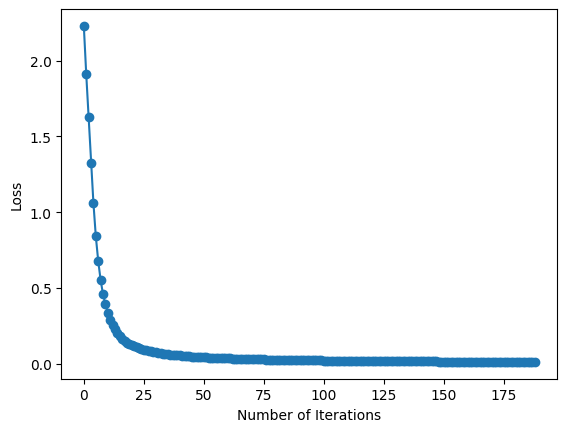

In [58]:
# Above shown is the loss for the last five epochs of the MLPClassifier with the given configuration

# Now let's check the performance of the model

fig, axes = plt.subplots(1,1)
axes.plot(mlp.loss_curve_, '-o')
axes.set_xlabel("Number of Iterations")
axes.set_ylabel("Loss")
plt.show()

In [59]:
# Model Evalaution

predictions = mlp.predict(x_test)
predictions[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [60]:
y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [61]:
# Calculating the accuracy with y_test and predictions

accuracy_score(y_test, predictions)

0.9146800501882058